In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the dataset
df = pd.read_csv("../Data/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


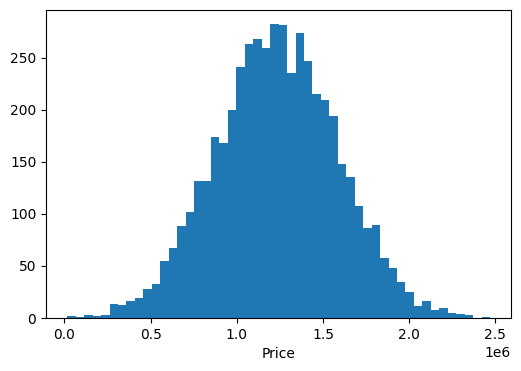

In [10]:
## Checkout the distribution of price column
plt.figure(figsize=(6,4),)
plt.hist(df['Price'],bins=50)
plt.xlabel("Price")
plt.show()

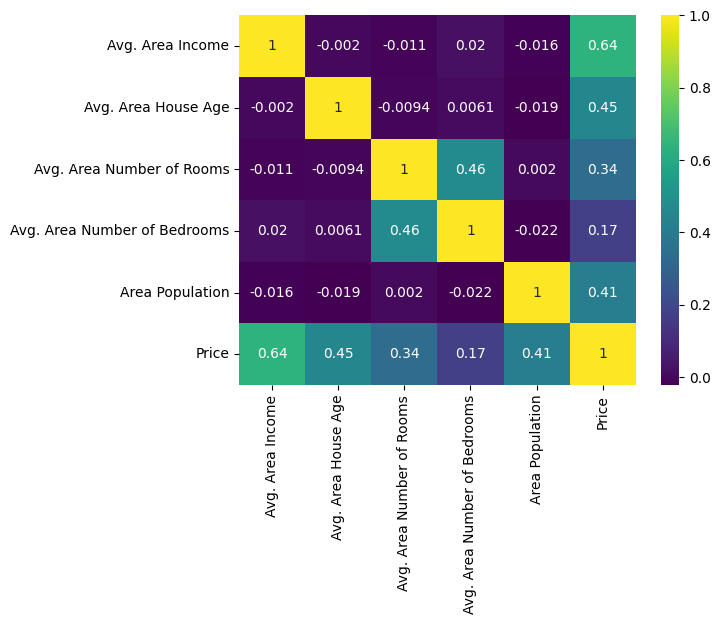

In [16]:
## Visualizing the correlation of dataset
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='viridis',annot=True)
plt.show()

In [37]:
## Train-Test split and scalling the input data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Address','Price'],axis=1).values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
scalled_X_train = scaler.transform(X_train)
scalled_X_test = scaler.transform(X_test)

In [38]:
## Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scalled_X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Coefficients
print(model.coef_)
print(model.intercept_)

[232679.72464304 163841.04659288 121110.55547764   2892.81511895
 151252.34237708]
1228219.1492415695


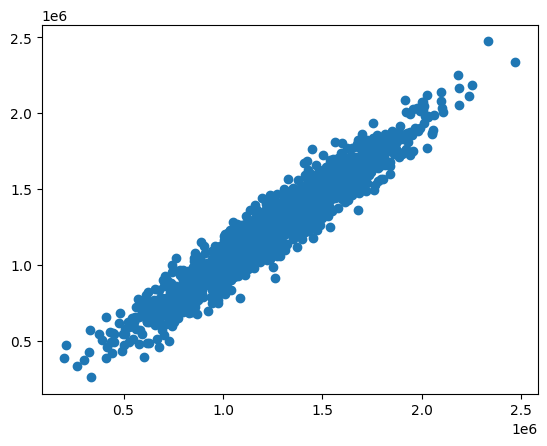

In [40]:
## Model evaluation
y_pred = model.predict(scalled_X_test)

# Comparing y_pred with the actual y_test
plt.scatter(y_test,y_pred)
plt.show()


In [41]:
## Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',root_mean_squared_error(y_test,y_pred))

MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
